In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math

### Read Dataset

Read the dataset in this section.

In [2]:
data = pd.read_csv('heart.csv')

### Prepare Dataset

First of all, search for missing values in the dataset. if there are missing values, handle them however you want.

In [3]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Then, read the dataset catalog. There are some categorical features with the "int" type. Encode these features so that you can distinguish between numerical and categorical features.

In [4]:
data['sex'] = pd.cut(data['sex'], bins=[-np.inf, 0, np.inf], labels=['female', 'male'])
data['cp'] = pd.cut(data['cp'], bins=[-np.inf, 0, 1, 2, np.inf], labels=['Value 1', 'Value 2', 'Value 3', 'Value 4'])
data['fbs'] = pd.cut(data['fbs'], bins=[-np.inf, 0, np.inf], labels=['false', 'true'])
data['restecg'] = pd.cut(data['restecg'], bins=[-np.inf, 0, 1, np.inf], labels=['Value 0', 'Value 1', 'Value 2'])
data['exang'] = pd.cut(data['exang'], bins=[-np.inf, 0, np.inf], labels=['no', 'yes'])
data['slope'] = pd.cut(data['slope'], bins=[-np.inf, 0, 1, np.inf], labels=['Value 1', 'Value 2', 'Value 3'])
data['ca'] = pd.cut(data['ca'], bins=[-np.inf, 0, 1, 2, np.inf], labels=['0 major vessels', '1 major vessels', '2 major vessels', '3 major vessels'])
data['thal'] = pd.cut(data['thal'], bins=[-np.inf, 1, 2, np.inf], labels=['normal', 'fixed defect', 'reversable defect'])

data['age'] = pd.cut(data['age'], bins=[-np.inf, 35, 45, 55, 65, np.inf], labels=['<35', '35-45', '45-55', '55-65', '65<'])
data['trestbps'] = pd.cut(data['trestbps'], bins=[-np.inf, 100, 110, 120, 130, 140, 150, np.inf], labels=['<100', '100-110', '110-120', '120-130', '130-140', '140-150', '150<'])
data['chol'] = pd.cut(data['chol'], bins=[-np.inf, 150, 200, 250, 300, 350, 400, np.inf], labels=['<150', '150-200', '200-250', '250-300', '300-350', '350-400', '400<'])
data['thalach'] = pd.cut(data['thalach'], bins=[-np.inf, 140, 150, 160, 170, 180, 190, np.inf], labels=['<140', '140-150', '150-160', '160-170', '170-180', '180-190', '190<'])
data['oldpeak'] = pd.cut(data['oldpeak'], bins=[-np.inf, 0.5, 1, 1.5, 2, 2.5, np.inf], labels=['<0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5<'])

print(data.dtypes)

age         category
sex         category
cp          category
trestbps    category
chol        category
fbs         category
restecg     category
thalach     category
exang       category
oldpeak     category
slope       category
ca          category
thal        category
target         int64
dtype: object


### Declare feature vector and target variable

Here, you are supposed to convert pandas data frame into feature vectors and target variables

In [5]:
data = data.to_numpy()

In [6]:
X = data.T[0:13].T
Y = data.T[13].T

### Split data into separate training and test set

Now it's time to split X and y into separate training and test set. You can use the sklearn library for this section.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train = X_train.tolist()
X_test = X_test.tolist()
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

## Implement desicion tree algorithm

In this cell, you are going to implement your decision tree. Feel free to add more arguments to functions or add your desired functions.

In [8]:
def H(S):
    return -(S.count(0)/len(S))*(math.log((S.count(0)/len(S)), 2) if S.count(0)!=0 else 0)-(S.count(1)/len(S))*(math.log((S.count(1)/len(S)), 2) if S.count(1)!=0 else 0)

def gini(S):
    return 1-((S.count(0)/len(S))**2+(S.count(1)/len(S))**2)

def classify(x, y, attr):
    out_x = []
    out_y = []
    col = []
    for k in list(set(np.array(x).T.tolist()[attr])):
        col.append(k)
        out_x.append([])
        out_y.append([])
        for i, j in zip(x, y):
            if (i[attr]==k):
                out_x[-1].append(i)
                out_y[-1].append(j)
    return out_x, out_y, col

def find_best_attr(x, y, metric):
    if (len(set(y))==1):
        label = y[0]
        return 'leaf', label
    label = (2*sum(y))//len(y)
    if (metric=='entropy'):
        IG = []
        for i in range(len(x[0])):
            v_x, v_y,_ = classify(x, y, i)
            s = 0
            for i, j in zip(v_x, v_y):
                s+=len(i)/len(x)*H(j)
            IG.append(H(y) - s)
        attr = IG.index(max(IG))
    if (metric=='gini'):
        gini = []
        for i in range(len(x[0])):
            v_x, v_y,_ = classify(x, y, i)
            s = 0
            for i, j in zip(v_x, v_y):
                s+=len(i)/len(x)*gini(j)
            gini.append(s)
        attr = gini.index(min(gini))
    return attr, label


class DecisionTree:
     
    def __init__(self, criterion='entropy', max_depth=math.inf):
        """
        Parameters:
        
        criterion -- “gini” for the Gini impurity and “entropy” for the information gain. (default “entropy”)
        max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
        """
        self.criterion = criterion
        self.max_depth = max_depth
        self.root = None
        self.tree = []
        
    
    def fit(self, x, y):
        """
        Build a decision tree classifier from the training set (X, y).

        Returns:
        self : Fitted estimator
        """
        q_x = [[x[:], None, None]]
        q_y = [[y[:], None, None]]
        attr, label = find_best_attr(x, y, 'entropy')
        out_x, out_y, col = classify(x, y, attr)
        self.root = attr
        while len(q_x)!=0:
            q = q_x.pop(0)[:]
            d = q_y.pop(0)[:]
            x = q[0]
            y = d[0]
            attr, label = find_best_attr(x, y, 'entropy')
            self.tree.append([q[1], attr, q[2], label])
            if(attr!='leaf'):
                out_x, out_y, col = classify(x, y, attr)
                for i, j, k in zip(out_x, out_y, col):
                    q_x.append([i[:], attr, k])
                    q_y.append([j[:], attr, k])
        return
    
    def predict(self, x):
        """
        Predict class value for X.

        Returns:
        y : The predicted classes
        """
        k = self.root
        c = 0
        while k!='leaf':
            c+=1
            for i in self.tree:
                if i[0]==k and x[k]==i[2]:
                    k = i[1]
                    label = i[3]
                    break
            if c>min(len(self.tree), self.max_depth):
                break
        return label
        
# a = [
# ['s1','h2','h3','l4'],
# ['s1','h2','h3','s4'],
# ['o1','h2','h3','l4'],
# ['r1','m2','h3','l4'],
# ['r1','c2','n3','l4'],
# ['r1','c2','n3','s4'],
# ['o1','c2','n3','s4'],
# ['s1','m2','h3','l4'],
# ['s1','c2','n3','l4'],
# ['r1','m2','n3','l4'],
# ['s1','m2','n3','s4'],
# ['o1','m2','h3','s4'],
# ['o1','h2','n3','l4'],
# ['r1','m2','h3','s4']
# ]
# b = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]
# d = DecisionTree('entropy',)
# d.fit(a, b)
# for i in a:
#     print(d.predict(i))

### Part 1 : Compare Gini and Entropy 

In [9]:
dt_gini = DecisionTree('gini',)
dt_entropy = DecisionTree('entropy',)

In this cell, fit both declared trees on the train set and predict values on the test set.

In [10]:
dt_entropy.fit(X_train, Y_train)
dt_gini.fit(X_train, Y_train)
Y_pred_entropy = []
Y_pred_gini = []
for i in X_test:
    Y_pred_entropy.append(dt_entropy.predict(i))
    Y_pred_gini.append(dt_gini.predict(i))

Plot confusion matrix for both decision trees.

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Entropy: ')
print(accuracy_score(Y_test, Y_pred_entropy))
print(confusion_matrix(Y_test, Y_pred_entropy))
print('Gini: ')
print(accuracy_score(Y_test, Y_pred_gini))
print(confusion_matrix(Y_test, Y_pred_gini))

Entropy: 
0.6557377049180327
[[10 14]
 [ 7 30]]
Gini: 
0.6557377049180327
[[10 14]
 [ 7 30]]


### Part 2 : Let's add maximum depth!

Define an array of different maximum depths

[0.6721311475409836, 0.6721311475409836, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327, 0.6557377049180327]


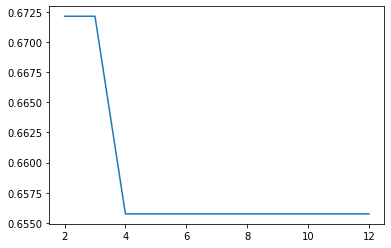

In [12]:
import matplotlib.pyplot as plt

max_depths = [2,3,4,5,6,7,8,9,10,11,12] # FILL THIS LIST WITH DESIRED VALUES
accuracy_scores = []

for max_depth in max_depths:
    Y_pred_entropy = []
    dt = DecisionTree(criterion='entropy', max_depth=max_depth) # Feel free to change the "entropy" to the "gini"
    dt.fit(X_train, Y_train)

    # FIT declared tree to the train set and predict values on the test set. then calcualte accuracy score on the test set
    # Feel free to use the sklearn moudle for calcualting accuracy score.
    for i in X_test:
        Y_pred_entropy.append(dt.predict(i))

    acc = accuracy_score(Y_test, Y_pred_entropy)
    accuracy_scores.append(acc)

print(accuracy_scores)
plt.plot(max_depths, accuracy_scores)
plt.show()


In [13]:
for depth, score in zip(max_depths, accuracy_scores):
    print(f"Depth : {depth}, Accuracy : {score}")

Depth : 2, Accuracy : 0.6721311475409836
Depth : 3, Accuracy : 0.6721311475409836
Depth : 4, Accuracy : 0.6557377049180327
Depth : 5, Accuracy : 0.6557377049180327
Depth : 6, Accuracy : 0.6557377049180327
Depth : 7, Accuracy : 0.6557377049180327
Depth : 8, Accuracy : 0.6557377049180327
Depth : 9, Accuracy : 0.6557377049180327
Depth : 10, Accuracy : 0.6557377049180327
Depth : 11, Accuracy : 0.6557377049180327
Depth : 12, Accuracy : 0.6557377049180327


Now compare the accuracy score of decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees.

در دو حالت آنتروپی و جینی به درصد دقت یکسانی در اکثر آزمایشات رسیدم فقط در یک مورد دقت‌های متفاوت دادند که به نظرم به دلیل
تعداد کم دیتا و ریز دسته بندی کردن برای داده‌های پیوسته که باعث یکسان شدن انتخاب ریشه‌ها توسط آنتروپی و جینی شده است می‌باشد
هنگام کاهش عمق در اکثر آزمایشات دیده شد که هنگامی که عمق زیاد باشد درصد دقت کاهش پیدا می‌کند و بهترین درصد دقت در عمق های کم مثل ۲ یا ۳ دیده شد
دلیل این اتفاق این است که هنگامی که عمق درخت زیاد شود درخت بر روی داده‌ آموزشی بیش‌برازش می‌کند بنابراین دقت آن بر روی داده‌ی تست کاهش پیدا می‌کند